In [31]:
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from sklearn.neighbors import KDTree
from sklearn.neighbors import NearestNeighbors


import os
from os.path import isfile, join
import sys


import yt
from yt.utilities.cosmology import Cosmology


plt.rcParams['font.weight'] = 'normal'
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='stixgeneral'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.facecolor'] = 'white'

In [69]:
!pwd

/data/jhl1862/TNG


How to download sublink mergertree data (change API-key)

wget -nd -nc -nv -e robots=off -l 1 -r -A hdf5 --content-disposition --header="API-Key: 74cc6d5897de914d213fb0b6104df40a" "http://www.tng-project.org/api/TNG100-1/files/sublink/?format=api" --no-check-certificate

https://www.tng-project.org/data/docs/specifications/

Redshift and Age for each snapshot (0 to 99)

In [6]:
h=0.6774


z_list=[20.05, 14.99, 11.98, 10.98, 10.00, 9.39, 9.00, 8.45, 8.01, 7.60, 7.24, 7.01, 6.49, 6.01, 5.85, 5.53, 5.23, 5.00, 4.66, 4.43, 4.18, 4.01, 3.71, 3.49, 3.28, 3.01, 2.90, 2.73, 2.58, 2.44,\
   2.32, 2.21, 2.10, 2.00, 1.90, 1.82, 1.74, 1.67, 1.60, 1.53, 1.50, 1.41, 1.36, 1.30, 1.25, 1.21, 1.15, 1.11, 1.07, 1.04, 1.00, 0.95, 0.92, 0.89, 0.85, 0.82, 0.79, 0.76, 0.73, 0.70, 0.68,\
   0.64, 0.62, 0.60, 0.58, 0.55, 0.52, 0.50, 0.48, 0.46, 0.44, 0.42, 0.40, 0.38, 0.36, 0.35, 0.33, 0.31, 0.30, 0.27, 0.26, 0.24, 0.23, 0.21, 0.20, 0.18, 0.17, 0.15, 0.14, 0.13, 0.11, 0.10,
   0.08, 0.07, 0.06, 0.05, 0.03, 0.02, 0.01, 0.00]
t_list=[0.129, 0.271, 0.370, 0.418, 0.475, 0.517, 0.547, 0.596, 0.640, 0.687, 0.732, 0.764, 0.844, 0.932, 0.965, 1.036, 1.112, 1.177, 1.282, 1.366, 1.466, 1.540, 1.689, 1.812, 1.944, 2.145,\
   2.238, 2.384, 2.539, 2.686, 2.839, 2.981, 3.129, 3.285, 3.447, 3.593, 3.744, 3.902, 4.038, 4.206, 4.293, 4.502, 4.657, 4.816, 4.980, 5.115, 5.289, 5.431, 5.577, 5.726, 5.878, 6.073,\
   6.193, 6.356, 6.522, 6.692, 6.822, 6.998, 7.132, 7.314, 7.453, 7.642, 7.786, 7.932, 8.079, 8.280, 8.432, 8.587, 8.743, 8.902, 9.062, 9.225, 9.389, 9.556, 9.724, 9.837, 10.009, 10.182,\
   10.299, 10.535, 10.654, 10.834, 11.016, 11.138, 11.323, 11.509, 11.635, 11.824, 11.951, 12.143, 12.337, 12.467, 12.663, 12.795, 12.993, 13.127, 13.328, 13.463, 13.667, 13.803]

How to read a hdf5 file

In [23]:
i=0

f=h5py.File('/data/shared/IllustrisTNG/illustris/data/tng/tree_extended.{}.hdf5'.format(i),'r')
t=list(f.keys())

f.close()

t

['DescendantID',
 'FirstProgenitorID',
 'FirstSubhaloInFOFGroupID',
 'GroupBHMass',
 'GroupBHMdot',
 'GroupCM',
 'GroupFirstSub',
 'GroupGasMetalFractions',
 'GroupGasMetallicity',
 'GroupLen',
 'GroupLenType',
 'GroupMass',
 'GroupMassType',
 'GroupNsubs',
 'GroupPos',
 'GroupSFR',
 'GroupStarMetalFractions',
 'GroupStarMetallicity',
 'GroupVel',
 'GroupWindMass',
 'Group_M_Crit200',
 'Group_M_Crit500',
 'Group_M_Mean200',
 'Group_M_TopHat200',
 'Group_R_Crit200',
 'Group_R_Crit500',
 'Group_R_Mean200',
 'Group_R_TopHat200',
 'LastProgenitorID',
 'MainLeafProgenitorID',
 'Mass',
 'MassHistory',
 'NextProgenitorID',
 'NextSubhaloInFOFGroupID',
 'NumParticles',
 'RootDescendantID',
 'SnapNum',
 'SubfindID',
 'SubhaloBHMass',
 'SubhaloBHMdot',
 'SubhaloBfldDisk',
 'SubhaloBfldHalo',
 'SubhaloCM',
 'SubhaloGasMetalFractions',
 'SubhaloGasMetalFractionsHalfRad',
 'SubhaloGasMetalFractionsMaxRad',
 'SubhaloGasMetalFractionsSfr',
 'SubhaloGasMetalFractionsSfrWeighted',
 'SubhaloGasMetallicit

How to read SubLink data

In [33]:
for j in [99]: #range(100):
    mass = np.zeros((1,1))
    
    for i in range(20):
        with h5py.File("/data/shared/IllustrisTNG/illustris/data/tng/tree_extended.{}.hdf5".format(i), 'r') as f:
            snap = np.array(f['SnapNum'])
            index=np.where(snap==j)[0]
            
            mass_t=np.array(f['SubhaloMass'])[index]*1e10/h
            print(mass_t.shape)
            mass_t=mass_t[:,np.newaxis]
            mass = np.r_[mass, mass_t]
            
            
    mass=mass[1:,:]
    print(mass.shape)
    np.save("./m_halo_tng100-1_"+str(j)+"th", mass)

(139392,)
(107065,)
(83729,)
(134791,)
(136931,)
(138883,)
(139089,)
(137038,)
(137592,)
(145021,)
(160816,)
(190433,)
(228089,)
(253521,)
(292078,)
(327000,)
(372633,)
(488416,)
(488276,)
(260854,)
(4361647, 1)


(array([2.290000e+02, 2.987422e+06, 1.051274e+06, 2.464200e+05,
        5.755400e+04, 1.460900e+04, 3.361000e+03, 6.310000e+02,
        1.270000e+02, 2.000000e+01]),
 array([ 7.43275142,  8.15029016,  8.86782891,  9.58536766, 10.30290641,
        11.02044516, 11.73798391, 12.45552266, 13.17306141, 13.89060016,
        14.6081389 ]),
 <a list of 10 Patch objects>)

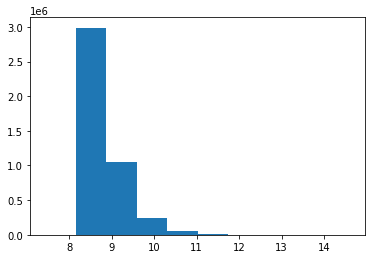

In [22]:
plt.hist(np.log10(mass))

In [29]:
for j in [99]: #range(100):
    pos = np.zeros((1,3))
    
    for i in range(20):
        with h5py.File("/data/shared/IllustrisTNG/illustris/data/tng/tree_extended.{}.hdf5".format(i), 'r') as f:
            snap = np.array(f['SnapNum'])
            index=np.where(snap==j)[0]
            
            pos_t=np.array(f['SubhaloPos'])[index]/h/(1+z_list[j]) # kpc unit
            print(pos_t.shape)
            pos = np.r_[pos, pos_t]
            
            
    pos=pos[1:,:]
    print(pos.shape)
    np.save("./pos_halo_tng100-1_"+str(j)+"th", pos)

(139392, 3)
(107065, 3)
(83729, 3)
(134791, 3)
(136931, 3)
(138883, 3)
(139089, 3)
(137038, 3)
(137592, 3)
(145021, 3)
(160816, 3)
(190433, 3)
(228089, 3)
(253521, 3)
(292078, 3)
(327000, 3)
(372633, 3)
(488416, 3)
(488276, 3)
(260854, 3)
(4361647, 3)


In [39]:
j=99
pos=np.load("./pos_halo_tng100-1_{}th.npy".format(99))

X=pos[:10000,:]
nbrs = NearestNeighbors(n_neighbors=100, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [65]:
i_halo=10

print(distances[i_halo,:])
print(indices[i_halo])

[  0.          45.14859499  85.36318233  92.38158712 111.23930565
 112.48543107 129.26624336 134.4501667  137.00486362 139.62822739
 142.3096268  142.99411395 146.29023281 146.72297569 149.37175669
 150.46584746 152.55941751 158.39823482 159.28197543 159.35497524
 159.73352273 160.12629503 161.50094921 161.5447273  162.84135009
 164.02249002 165.03726063 166.09775029 166.50132454 170.20541906
 170.30612965 170.89886179 171.8750918  176.44480176 176.50367417
 182.16496381 183.65909014 184.02122244 185.13768912 187.62836395
 189.99894996 192.58232509 194.20513768 194.51032032 197.99783749
 200.66842119 201.13203551 206.85193208 207.40483872 207.45735382
 207.56045236 211.27805713 212.80989504 215.93260275 217.40982643
 222.38058772 225.60568883 225.7725243  229.18259491 230.62897294
 235.34512187 238.19796912 247.44552279 247.72432994 247.93511066
 250.84192631 253.06085825 253.19257267 254.6504174  255.44195609
 255.80938694 256.55593902 257.71281993 260.64857297 261.19969579
 262.60352

In [66]:
i_halo=indices[i_halo]
print(pos[i_halo,:])

[[16790.00390625 74593.5703125  70649.0703125 ]
 [16795.91796875 74549.6328125  70640.53125   ]
 [16748.36914062 74664.7265625  70671.2109375 ]
 [16804.47851562 74673.8203125  70692.484375  ]
 [16822.8828125  74677.4609375  70714.3046875 ]
 [16739.25976562 74494.4921875  70665.2421875 ]
 [16667.109375   74633.3515625  70644.15625   ]
 [16770.70117188 74517.7421875  70539.734375  ]
 [16843.3828125  74719.         70635.34375   ]
 [16731.9609375  74707.9140625  70704.3203125 ]
 [16926.13476562 74627.9140625  70672.328125  ]
 [16738.65039062 74477.4453125  70583.3046875 ]
 [16887.29296875 74552.359375   70750.25      ]
 [16662.72070312 74551.03125    70708.375     ]
 [16731.77148438 74592.2421875  70786.6171875 ]
 [16924.91015625 74560.109375   70706.6953125 ]
 [16905.3046875  74653.7578125  70569.3359375 ]
 [16779.41796875 74714.0546875  70546.7890625 ]
 [16798.359375   74570.4609375  70806.4453125 ]
 [16713.6328125  74673.375      70534.2109375 ]
 [16866.74023438 74607.1171875  70788.50

In [67]:
mass[i_halo]

array([[5.37905824e+11],
       [3.06001568e+08],
       [6.26930112e+08],
       [1.56732528e+08],
       [8.06052864e+08],
       [3.65709184e+08],
       [8.56268160e+08],
       [7.77655168e+08],
       [1.71659424e+08],
       [1.56732528e+08],
       [6.71710784e+08],
       [6.94101120e+08],
       [3.28391936e+08],
       [9.40395072e+08],
       [5.74685824e+08],
       [2.16440128e+08],
       [4.61915904e+09],
       [2.38830496e+08],
       [2.68684320e+08],
       [9.47858496e+08],
       [8.28911206e+10],
       [1.18781427e+09],
       [5.82149312e+08],
       [1.71659424e+08],
       [1.64195968e+08],
       [1.79122864e+08],
       [3.20168243e+09],
       [1.49269056e+08],
       [2.91074656e+08],
       [9.18004736e+08],
       [6.28056576e+08],
       [3.65709184e+08],
       [4.10489888e+08],
       [2.76147776e+08],
       [6.26930112e+08],
       [3.88099552e+08],
       [1.56732528e+08],
       [9.34961472e+08],
       [4.85124384e+08],
       [9.04811008e+08],


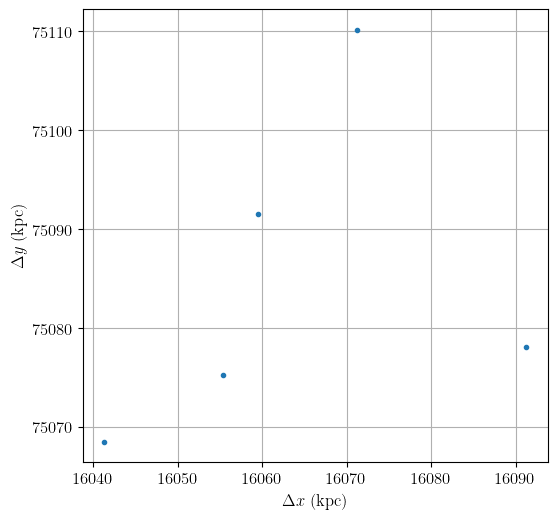

In [32]:
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)


ax1.plot(pos[i_halo,0], pos[i_halo,1], '.')


ax1.set_xlabel(r'$\Delta x$ (kpc)')
ax1.set_ylabel(r'$\Delta y$ (kpc)')


#ax1.set_xlim(0,3e4)
#ax1.set_ylim(1e1, 4e8)


#ax1.legend(loc=2)
#ax2.legend(loc=1)

ax1.grid()

In [9]:
print("{:.2e}".format(3.45456457))

3.45e+00
